In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

# ScikitLearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# First iteration with missing values removed

In [2]:
# Importing train dataframe
train_df_1 = pd.read_csv("./data/train_df_1.csv")
train_df_1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.03,34.16,39.0,2731.0,366.0,1034.0,338.0,9.8098,500001.0,INLAND
1,-121.62,39.16,16.0,2037.0,464.0,1267.0,451.0,2.4556,97100.0,INLAND
2,-120.55,38.45,17.0,2277.0,474.0,767.0,356.0,2.5208,99100.0,INLAND
3,-117.10,32.67,26.0,2629.0,763.0,2721.0,767.0,2.0982,109100.0,NEAR OCEAN
4,-122.89,38.38,16.0,2017.0,369.0,931.0,336.0,5.7664,267500.0,<1H OCEAN


In [3]:
# Importing test dataframe
test_df_1 = pd.read_csv("./data/test_df_1.csv")
test_df_1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.69,36.62,19.0,1907.0,323.0,681.0,270.0,6.0332,244900.0,<1H OCEAN
1,-122.64,37.96,29.0,377.0,58.0,151.0,67.0,9.5551,500001.0,NEAR OCEAN
2,-121.49,38.47,26.0,6121.0,1185.0,4224.0,1105.0,2.3496,68000.0,INLAND
3,-121.88,37.39,13.0,3334.0,565.0,2240.0,561.0,7.1050,273900.0,<1H OCEAN
4,-117.25,34.12,17.0,3107.0,752.0,2160.0,643.0,1.8463,72600.0,INLAND


### Iteration 1 : linear regression with missing values removed

In [52]:
# Defining train y (target) and X (features)
y_train = train_df_1['median_house_value']
X_train = train_df_1.drop(["median_house_value", "ocean_proximity"], axis=1)

# Defining test y (target) and X (features)
y_test = test_df_1['median_house_value']
X_test = test_df_1.drop(["median_house_value", "ocean_proximity"], axis=1)

# Defining linear regression model.
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Store predictions in a variable, for metrics uses
y_pred = model.predict(X_test)

# # Evaluate the model with the test set
# model.score(X_test, y_test)

In [53]:
# Evaluate the model
r2 = model.score(X_test, y_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
# rmsle = np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))

####### ERROR WITH METRICS EXCEPT R2. DON'T KNOW WHY ####
print(f'r2 : {r2}')
print(f'mae : {mae}')
print(f'mse : {mse}')
print(f'rmse : {rmse}')
# print(f'rmse : {rmsle}')

r2 : 0.6536568034408423
mae : 50317.3987714753
mse : 4636847377.285391
rmse : 68094.40048407351


# Second iteration with scaled data

In [46]:
# Importing train dataframe
train_df_2 = pd.read_csv("./data/train_df_2.csv")
train_df_2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.03,34.16,0.821864,0.041261,-0.407350,-0.340876,-0.424146,3.143238,500001.0,INLAND
1,-121.62,39.16,-1.002748,-0.275259,-0.176817,-0.142075,-0.130410,-0.742292,97100.0,INLAND
2,-120.55,38.45,-0.923417,-0.165800,-0.153294,-0.568687,-0.377356,-0.707844,99100.0,INLAND
3,-117.10,32.67,-0.209438,-0.005259,0.526543,1.098512,0.691010,-0.931121,109100.0,NEAR OCEAN
4,-122.89,38.38,-1.002748,-0.284381,-0.400293,-0.428758,-0.429345,1.006942,267500.0,<1H OCEAN


In [47]:
# Importing train dataframe
test_df_2 = pd.read_csv("./data/test_df_2.csv")
test_df_2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.69,36.62,-0.764755,-0.334550,-0.508502,-0.642064,-0.600907,1.147903,244900.0,<1H OCEAN
1,-122.64,37.96,0.028554,-1.032353,-1.131882,-1.094273,-1.128592,3.008670,500001.0,NEAR OCEAN
2,-121.49,38.47,-0.209438,1.587373,1.519246,2.380907,1.569617,-0.798296,68000.0,INLAND
3,-121.88,37.39,-1.240741,0.316277,0.060773,0.688112,0.155527,1.714180,273900.0,<1H OCEAN
4,-117.25,34.12,-0.923417,0.212747,0.500667,0.619854,0.368680,-1.064211,72600.0,INLAND


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

y_train = train_df_1['median_house_value']
X_train = train_df_1.drop(["median_house_value", "ocean_proximity"], axis=1)

# Defining test y (target) and X (features)
y_test = test_df_1['median_house_value']
X_test = test_df_1.drop(["median_house_value", "ocean_proximity"], axis=1)

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)
KNeighborsRegressor(...)
print(neigh.predict([[1.5]]))

### Iteration 2 : linear regression with missing values removed, ocean_proximity removed and data scaling

In [49]:
# Defining train y (target) and X (features)
y_train2 = train_df_2['median_house_value']
X_train2 = train_df_2.drop(["median_house_value", "ocean_proximity"], axis=1)

# Defining test y (target) and X (features)
y_test2 = test_df_2['median_house_value']
X_test2 = test_df_2.drop(["median_house_value", "ocean_proximity"], axis=1)

# Defining linear regression model.
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train2, y_train2)

# Store predictions in a variable, for metrics uses
y_pred2 = model.predict(X_test2)

# # Evaluate the model with the test set
# model.score(X_test, y_test)

<AxesSubplot:ylabel='Count'>

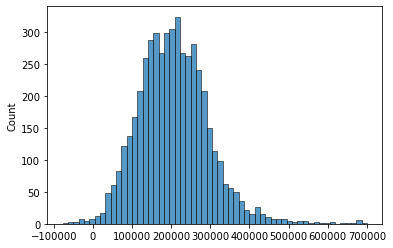

In [50]:
sns.histplot(y_pred2)

In [54]:
# Evaluate the model
r2 = model.score(X_test2, y_test2)
mae = metrics.mean_absolute_error(y_test2, y_pred2)
mse = metrics.mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))
# rmsle = np.sqrt(metrics.mean_squared_log_error(y_test2, y_pred2))

####### ERROR WITH METRICS EXCEPT R2. DON'T KNOW WHY ####
print(f'r2 : {r2}')
print(f'mae : {mae}')
print(f'mse : {mse}')
print(f'rmse : {rmse}')
# print(f'rmsle : {rmsle}')

r2 : -2.335245535061521
mae : 50317.39877147517
mse : 4636847377.285418
rmse : 68094.4004840737


### TESTING NORMALIZE

In [6]:
# Importing train dataframe
train_df_3 = pd.read_csv("./data/train_df_3.csv")
train_df_3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.03,34.16,0.821864,0.041261,-0.407350,-0.340876,-0.424146,3.143238,500001.0,INLAND
1,-121.62,39.16,-1.002748,-0.275259,-0.176817,-0.142075,-0.130410,-0.742292,97100.0,INLAND
2,-120.55,38.45,-0.923417,-0.165800,-0.153294,-0.568687,-0.377356,-0.707844,99100.0,INLAND
3,-117.10,32.67,-0.209438,-0.005259,0.526543,1.098512,0.691010,-0.931121,109100.0,NEAR OCEAN
4,-122.89,38.38,-1.002748,-0.284381,-0.400293,-0.428758,-0.429345,1.006942,267500.0,<1H OCEAN


In [7]:
# Importing train dataframe
test_df_3 = pd.read_csv("./data/test_df_3.csv")
test_df_3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.69,36.62,-0.764755,-0.334550,-0.508502,-0.642064,-0.600907,1.147903,244900.0,<1H OCEAN
1,-122.64,37.96,0.028554,-1.032353,-1.131882,-1.094273,-1.128592,3.008670,500001.0,NEAR OCEAN
2,-121.49,38.47,-0.209438,1.587373,1.519246,2.380907,1.569617,-0.798296,68000.0,INLAND
3,-121.88,37.39,-1.240741,0.316277,0.060773,0.688112,0.155527,1.714180,273900.0,<1H OCEAN
4,-117.25,34.12,-0.923417,0.212747,0.500667,0.619854,0.368680,-1.064211,72600.0,INLAND


In [8]:
# Defining train y (target) and X (features)
y_train3 = train_df_3['median_house_value']
X_train3 = train_df_3.drop(["median_house_value", "ocean_proximity"], axis=1)

# Defining test y (target) and X (features)
y_test3 = test_df_3['median_house_value']
X_test3 = test_df_3.drop(["median_house_value", "ocean_proximity"], axis=1)

# Defining linear regression model.
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train3, y_train3)

# Store predictions in a variable, for metrics uses
y_pred3 = model.predict(X_test3)

# # Evaluate the model with the test set
# model.score(X_test, y_test)

In [11]:
# Evaluate the model
r2 = model.score(X_test3, y_test3)
mae = metrics.mean_absolute_error(y_test3, y_pred3)
mse = metrics.mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(metrics.mean_squared_error(y_test3, y_pred3))
# rmsle = np.sqrt(metrics.mean_squared_log_error(y_test3, y_pred3))

####### ERROR WITH METRICS EXCEPT R2. DON'T KNOW WHY ####
print(f'r2 : {r2}')
print(f'mae : {mae}')
print(f'mse : {mse}')
print(f'rmse : {rmse}')
# print(f'rmsle : {rmsle}')

r2 : 0.6536568034408403
mae : 50317.398771475026
mse : 4636847377.285418
rmse : 68094.4004840737
